In [30]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4
from datetime import timedelta, datetime

import matplotlib.pyplot as plt

import netCDF4

In [158]:
netCDF4.Dataset('../data/world_oscar_vel_5d2019.nc')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    year: 2019
    description: Sea Surface Velocity
    version: 2006.0
    source: Gary Lagerloef, ESR (lager@esr.org) Fabrice Bonjean (bonjean@esr.org) and Kathleen Dohan (kdohan@esr.org)
    contact: Kathleen Dohan (kdohan@esr.org) or John T. Gunn (gunn@esr.org)
    company: Earth & Space Research, Seattle, WA
    reference1: Bonjean F. and G.S.E. Lagerloef, 2002 ,"Diagnostic model and analysis of the surface currents in the tropical Pacific ocean", J. Phys. Oceanogr., 32, 2,938-2,954
    date: 08-Mar-2019
    note: Longitude extends from 20.5 E to 419.5 E to avoid a break in major ocean basins. Data repeats in overlap region.
    dimensions(sizes): latitude(140), longitude(360), time(14), depth(1)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), int32 time(time), int32 date(time), float32 depth(depth), int32 mask(latitude,longitude), float32 u(time,d

In [167]:
filenames = {
    'U': "../data/world_oscar_vel_5d2019.nc",
    'V': "../data/world_oscar_vel_5d2019.nc"
}

variables = {
    'U': 'uf',
    'V': 'vf'
}

dimensions = {
    'lat': 'latitude',
    'lon': 'longitude',
    'time': 'time'
}

fieldset = FieldSet.from_netcdf(filenames, variables, dimensions, allow_time_extrapolation=True)

FieldSamplingError: U sampled at (390.000000, 30.000000, 0.000000)

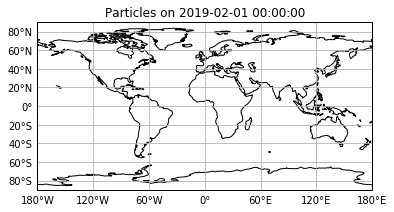

In [178]:
pset = ParticleSet.from_line(
    fieldset=fieldset,
    size=5,
    pclass=JITParticle,
    start=(50, 0),
    finish=(60, 0),
    time=datetime(2019, 2, 1)
)


pset.show(domain={'N': 30, 'S': 10, 'E': 390, 'W': 21})

In [169]:
pset.execute(AdvectionRK4, runtime=timedelta(days=31), dt=timedelta(minutes=5))

INFO: Compiled JITParticleAdvectionRK4 ==> /tmp/parcels-1000/27e7779bcc8e1412aa9d949b010cc883.so


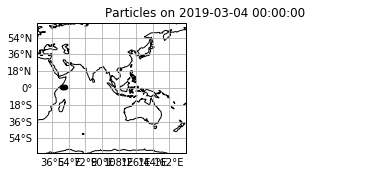

In [170]:
pset.show()